## Readability Challenge Machine Learning

In this machine learning project, we are going to be predicting the difficulty of different texts based on some important features. Since we only have the textual information, we are going to need to create new features and also tokenize the existing words into different words and sentences to understand some useful features. 

In addition to this, we would also find correlation between different features that we have created and see how much of an impact they make when we are performing the machine learning analysis and predictions respectively. 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import tqdm
import re
from tqdm import tqdm
import nltk
import missingno as msno
from wordcloud import WordCloud
try:
    import plotly.express as px
    from plotly import graph_objects as go
except:
    !pip install plotly
import warnings
warnings.filterwarnings("ignore")

Here, we are going to be just looking at the present directory and see the path that we are currently at so that we can understand where our datasets are present. 

In [6]:
pwd()

'C:\\Users\\suhas maddali\\Desktop\\Folders\\Machine Learning Projects\\Predicting-Readability-of-Texts-Using-Machine-Learning'

As can be seen below, the train path and the test path are created which would later be used to read the datasets based on where they are present and the path. 

In [7]:
TRAIN_PATH = 'Readability datasets/'
TEST_PATH = 'Readability datasets/'

Now is the time to store the .csv files in different variables so that we later can use them for the machine learning analysis and predictions. 

In [8]:
df_train = pd.read_csv(TRAIN_PATH + 'train.csv', low_memory = False)
df_test = pd.read_csv(TEST_PATH + 'test.csv', low_memory = False)
df_sample = pd.read_csv(TEST_PATH + 'sample_submission.csv', low_memory = False)

It is always a good idea to check the memory usage so that there won't be any issues when performing operations that require more RAM. Sometimes when we don't check the usage, there might be a case where the amount of RAM that is being consumed for the machine learning operations far exceeds the capacity of our RAM, leading to errors in the code. Therefore, it would be good to understand the total amount of RAM that is being used respectively. 

In [9]:
df_train.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 3.8 MB


Let us now perform the same operation for the test set to understand the data and also see the different columns where there are NULL values present. 

In [10]:
df_test.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         7 non-null      object
 1   url_legal  3 non-null      object
 2   license    3 non-null      object
 3   excerpt    7 non-null      object
dtypes: object(4)
memory usage: 8.2 KB


Performing the same operation for the sample dataframe to see the type of columns that we must include when doing the submission. 

In [11]:
df_sample.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      7 non-null      object 
 1   target  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 646.0 bytes


## Reading the Head of Training Data

Now, we see from the below that there are some columns that contain NULL values such as "url_legal" and "license" columns respectively. One observation from the table below is that there is only a text that we are given along with the "target" which is what we are going to predict for the future text along with "standard_error" respectively. 

Since there are not many features rather than just the text given, we have to be creating new features that helps us to get the best predictions in the test set. Therefore, we have to featurize based on the text and create now columns and append in our existing dataset which ensures that we get a model that has a good accuracy and low mean square error. 

In [12]:
df_train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


Taking a look at the test data where we are going to predict the "target" column, we see that there are some NULL values that are present in columns such as "url_legal" and "license". Below we have excerpts where we have to perform featurizations very similar to the one that would be performing on the training set respectively. 

In [13]:
df_test.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


Taking a look at the sample data where we must be giving the specific ID along with the predictions of our machine learning and deep learning algorithms and submit it. 

In [14]:
df_sample.head()

,id,target
0,c0f722661,0.0
1,f0953f0a5,0.0
2,0df072751,0.0
3,04caf4e0c,0.0
4,0e63f8bea,0.0


## Using Missingno to plot the missing null values
It would be a good idea to understand the missing values that are present in our data with the help of a figure. Below, we are going to be using the missingno library which gives us the missing values that are present based on different columns respectively. We see that there are a few missing values that are present in the columns "url_legal" and "license" respectively as marked below. 

In addition, we can also find that there are no missing values present for "excerpt", "target" and "standard_error" respectively. 

<AxesSubplot:>

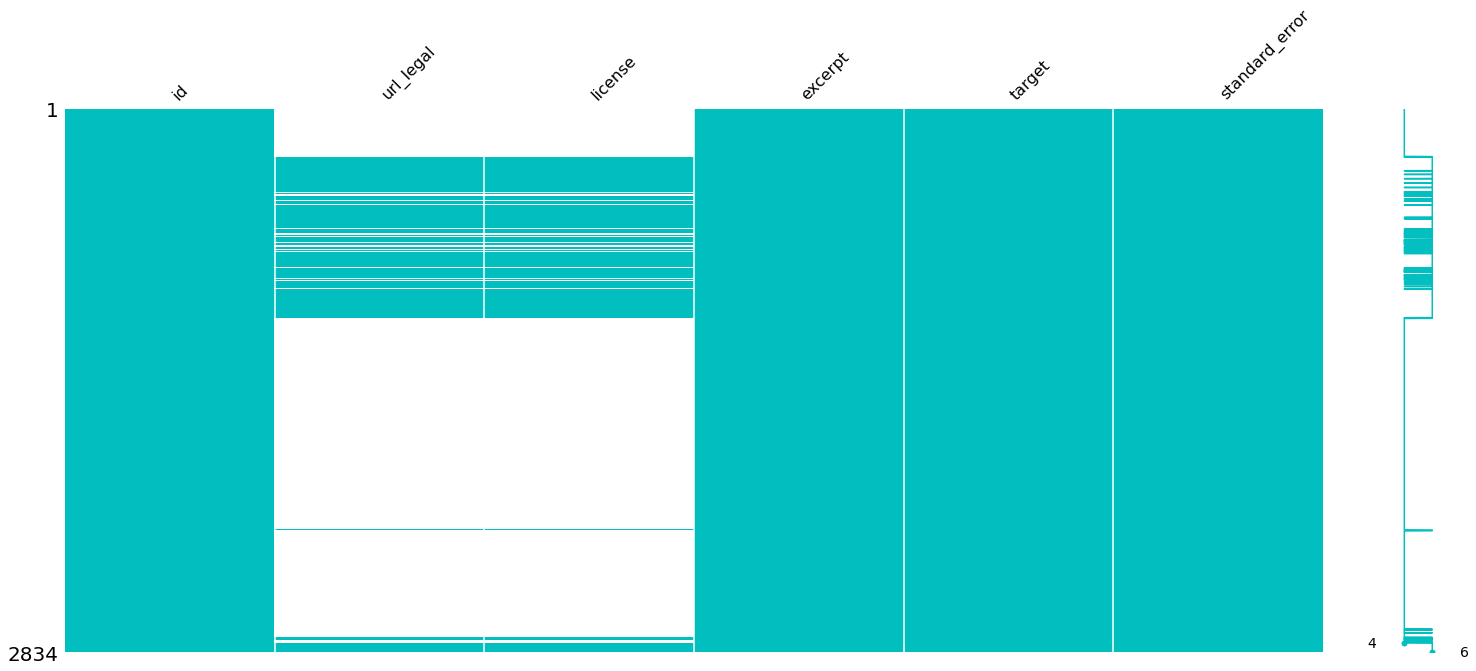

In [15]:
msno.matrix(df_train, color = (0.01, 0.75, 0.75))

## Creating Useful Functions
It would be a good idea to create functions and add some of the arguments so that we don't have to repeat the code again. In addition, we can just change the arguments and it would be applied entirely to the block that of code that is present in the function. Therefore, it would be really convenient to create functions along with useful arguments that we might change when we are implemented them in the future of our code. 

Below, we have defined a function called "plot_histogram" where it takes in the dataframe along with the column that we are interested and a few other arguments and plot a histogram of our configuration. 

In [16]:
def plot_histogram(dataframe: pd.DataFrame, column: str, x_title = None, y_title = None, edge_color = 'black', 
                   color = 'Green', total_bins = 20, font_size = 10):
    """
    In this function, we are going to plot a histogram for the dataframe that is given
    along with some modifications and different features of histogram plot
    """
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.hist(dataframe[column], bins = total_bins, edgecolor = edge_color, color = color)
    ax.set_title(f'Histogram Distribution of {column} values', fontsize = font_size + 5)
    ax.set_xlabel(column, fontsize = font_size)
    ax.set_ylabel("Total Number of Observations", fontsize = font_size)
    plt.show()

## Histogram of Target Variable
Since most of the parameters are set to default values, those values are taken into consideration when plotting the histogram plots respectively. Since we want to look at the column called 'target' in our data and it's distribution, we are using that column and giving it to the function so that it plots respectively. 

We see that the output is evenly distributed with the mean around -1. In addition, we find that there are very few values that are present that are greater than 1 or less than -3 as can be seen from the below plot. 

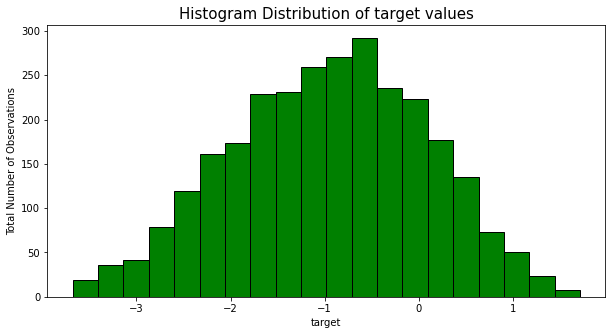

In [17]:
plot_histogram(df_train, column = 'target')

## Histogram of Standard_Error Values
In the same light, let us now look at the standard error distribution by using the function that we have created to plot the histogram. Now we have changed the color to see the changes and how they would be applied to the block of functions. 

There are a lot of values that are present around 0.5 than the other regions. We understand that there are very few values where the standard error is 0.6 or more. In addition, there are very few values where the standard error is below 0.4 respectively.  

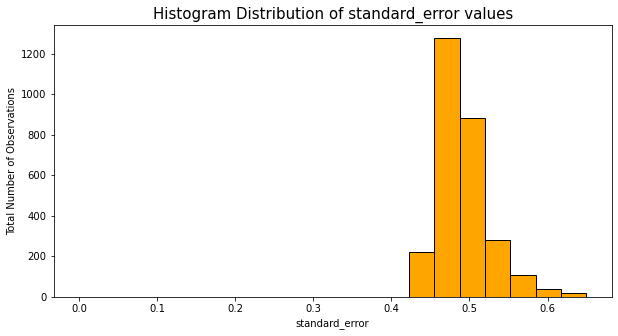

In [18]:
plot_histogram(df_train, column = 'standard_error', color = 'orange')

In [19]:
df_train['excerpt'].iloc[1]

'All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."\n"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?\nOh, I am so glad! Are you sure you\'re willing?"\n"I\'ve persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can\'t bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."\n"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.'

In [20]:
df_train['excerpt'].apply(lambda text: text.replace('\n', ' ')).iloc[1]

'All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections. At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go." "Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really? Oh, I am so glad! Are you sure you\'re willing?" "I\'ve persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can\'t bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in." "Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.'

In [21]:
df_train['excerpt'] = df_train['excerpt'].apply(lambda text: text.replace('\n', ' '))
df_test['excerpt'] = df_test['excerpt'].apply(lambda text: text.replace('\n', ' '))

In [22]:
df_train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [23]:
df_train['excerpt'].iloc[1]

'All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections. At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go." "Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really? Oh, I am so glad! Are you sure you\'re willing?" "I\'ve persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can\'t bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in." "Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.'

## Wordcloud function

We are going to be creating a wordcloud function that is important for machine learning. We are going to be using that function to create words and understand their frequency based on the size of those words respectively. Since it would be a good idea to use wordcloud in a function so that we could use the same block of code again.

From the observation, we see thta there are a few words such as "One" and "said" that are frequently occurring in our dataset. We were able to understand this with the help of the size of the words that are present in the wordcloud that indicate their frequency respectively. We also consider "." as a word and we see that it is also frequently occurrring respectively. There are some words that don't occur as much as the above mentioned words such as "country" and "never". 

Therefore, we were able to get a good understanding of the wordcloud figure and see the frequency of the occurence of the words based on the size in the figure given by the wordcloud. 

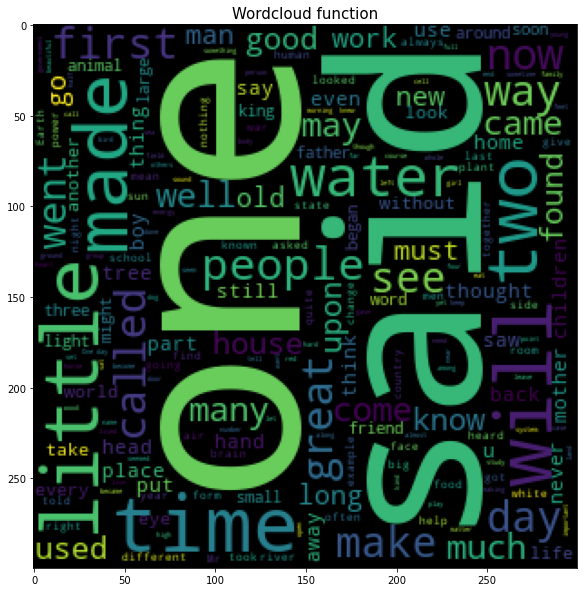

In [24]:
def wordcloud_function(df, title, column, fontsize = 15, 
                       figsize = (10, 10), width = 300, height = 300):
    """
    This function ensures that we get the size of the words based on their occurance 
    and we are going to use a figure to plot it in this function respectively. 
    """
    total_text = ''.join([text for text in df[column]])
    wordcloud = WordCloud(width = width, height = height).generate(total_text)
    plt.figure(figsize = figsize)
    plt.imshow(wordcloud)
    plt.title(title, fontsize = fontsize)
    plt.show()
wordcloud_function(df_train, "Wordcloud function", "excerpt")
    

## Creating Preprocessing Function

Now it is time to create a preprocessing function that would take into account the text and convert it in the form where the machine learning and deep learning models could use quite easily. Therefore, we are going to take that data and ensure that we understand how the machine learning models are going to perform in the future. 

In preprocessing function, we would just replace the punctuations and other things with only the text present in the excerpt. Later, we would lowercase the words and then remove the stopwords. Once the stopwords are removed, we are going to be lemmatizing those words (reducing words to their base form) so that their stem is retained along with taking the context. We would return the output as a list. 

In [25]:
def preprocessing_function(df):
    """
    This function takes into consideration the dataframe and extracts the text.
    In addition, it makes modifications to the text and converts it to a simpler form
    for machine learning processing respectively."""
    
    text_list = []
    for text in tqdm(df['excerpt'].values):
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = nltk.word_tokenize(text)
        [word for word in text if not word in set(stopwords.words("english"))]
        lemmatizer = nltk.WordNetLemmatizer()
        text = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(text)
        text_list.append(text)
    return text_list
        

We are going to store the output that is given by the preprocessing function into a variable and later use it. 

In [26]:
preprocessed_text = preprocessing_function(df_train)

100%|██████████████████████████████████████████████████████████████████████████████| 2834/2834 [01:49<00:00, 25.98it/s]


## Defining get_useful_features functions

It is now time to get the useful features that are important for machine learning. We would have to be creating new features that would help the machine learning models to get the best predictions for the difficulty of the text. 

Taking into consideration the excerpt and stopwords, we are going to be creating new feautres such as total number of words, sentence length, overall change in the text length and other features that are important for getting the machine learning outputs. The function would return the final dataframe that contains all the preprocessed output along with the newly created features that are important for machine learning. 

In [27]:
def get_useful_features(df, stop_words):
    """
    The function would take the dataframe and stopwords and then, convert the excerpts into different features
    such as the number of sentences, words and the lenght of the lemmas created along with the overall preprocessed
    essay length."""
    sentences = []
    num_of_words = []
    sent_length = []
    word_length = []
    lemma_length = []
    num_of_lemmas = []
    preprocessed_essay_length = []
    initial_text_length = []
    num_of_sentences = []
    text_shortage = []
    
    for text in tqdm(df['excerpt'].values):
        
        initial_length = len(text)
        initial_text_length.append(initial_length)
        num_sentences = len(sent_tokenize(text))
        num_of_sentences.append(num_sentences)
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = word_tokenize(text)
        num_words = len(text) 
        num_of_words.append(num_words)
        sent_length.append(num_words/num_sentences)
        word_length.append(initial_length/num_words)
        text = [word for word in text if not word in stop_words]
        lemmatizer = nltk.WordNetLemmatizer()
        text = [lemmatizer.lemmatize(word) for word in text]
        #print(text)
        num_lemmas = len(text)
        num_of_lemmas.append(num_lemmas)
        text = " ".join(text)
        #print(text)
        preprocessed_essay_length_value = len(text)
        preprocessed_essay_length.append(preprocessed_essay_length_value)
        #print(preprocessed_essay_length)
        #print(num_lemmas)
        lemma_length.append(preprocessed_essay_length_value/num_lemmas)
        
        text_shortage.append(preprocessed_essay_length_value/initial_length)
        
    final_df = pd.concat([pd.Series(sent_length), pd.Series(num_of_words),
                             pd.Series(word_length), pd.Series(lemma_length),
                             pd.Series(num_of_sentences), pd.Series(initial_text_length),
                             pd.Series(num_of_lemmas), pd.Series(preprocessed_essay_length),
                             pd.Series(text_shortage)], axis = 1)
    final_df.columns = ["sentence_length", "num_of_words", "word_length",
                           "lemma_length", "num_of_sentences",
                           "initial_text_length", "num_of_lemmas",
                           "preprocessed_essay_length", "text_shortage"]
    
    return final_df
        

We are now going to store those values into a variable that we can use to check the values respectively. 

In [28]:
final_df = get_useful_features(df_train, stop_words = set(stopwords.words("english")))

100%|█████████████████████████████████████████████████████████████████████████████| 2834/2834 [00:03<00:00, 826.12it/s]


We have created a dataframe and we see that there are different features that we are going to be giving to the machine learning models for predictions. We have converted the text in the form of different useful features such as the number of words, average word and sentence length, number of lemmas created and preprocessed essay length. Overall, this could be given to the machine learning models for prediction where the target which is nothing but the difficulty of the text would be predicted using machine learning. 

In [29]:
final_df.head()

,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,16.454545,181,5.480663,6.494505,11,992,91,591,0.595766
1,11.466667,172,5.447674,6.482353,15,937,85,551,0.588047
2,15.636364,172,5.279070,6.273810,11,908,84,527,0.580396
3,33.400000,167,5.443114,6.095745,5,909,94,573,0.630363
4,30.200000,151,4.788079,5.581081,5,723,74,413,0.571231


## Pairplot of Different Features 

It would be a good idea to see the pairplots which are nothing but a group of scatterplots where the values are spread based on the 2 features that are considered at hand. By looking at this pairplot, one would understand if there is any correlation between features and their values and spread respectively. 

When we get an almost a linear spread between features, we can understand that there is either a positive correlation or a negative correlation between the features at hand. 

Based on the observation, we see that there is a good correlation between number of words and intial text length. There is also a good positive correlation between the number of words and the text shortage metric that we have created. In addition, there is also a positive correlation between the lemma word average length and the overall average length of word before lemmatization. This tells us that based on how long the word is, the lemma form of the word would almost have identical size respectively. 

One more thing to observe based on the text values is that there is a slight negative correlation between the initial text length and the difficulty of the text. We can understand this to be true as when there are a lot of words in a sentence, it becomes easy to understand the text as the author usually would elaborate the points that he/she made and this ensures that there is clarity in the text and it being less difficult. More observations could be made using the pairplot function in seaborn. For now, we have made a good amount of useful observations that are important when doing the machine learning analysis. 

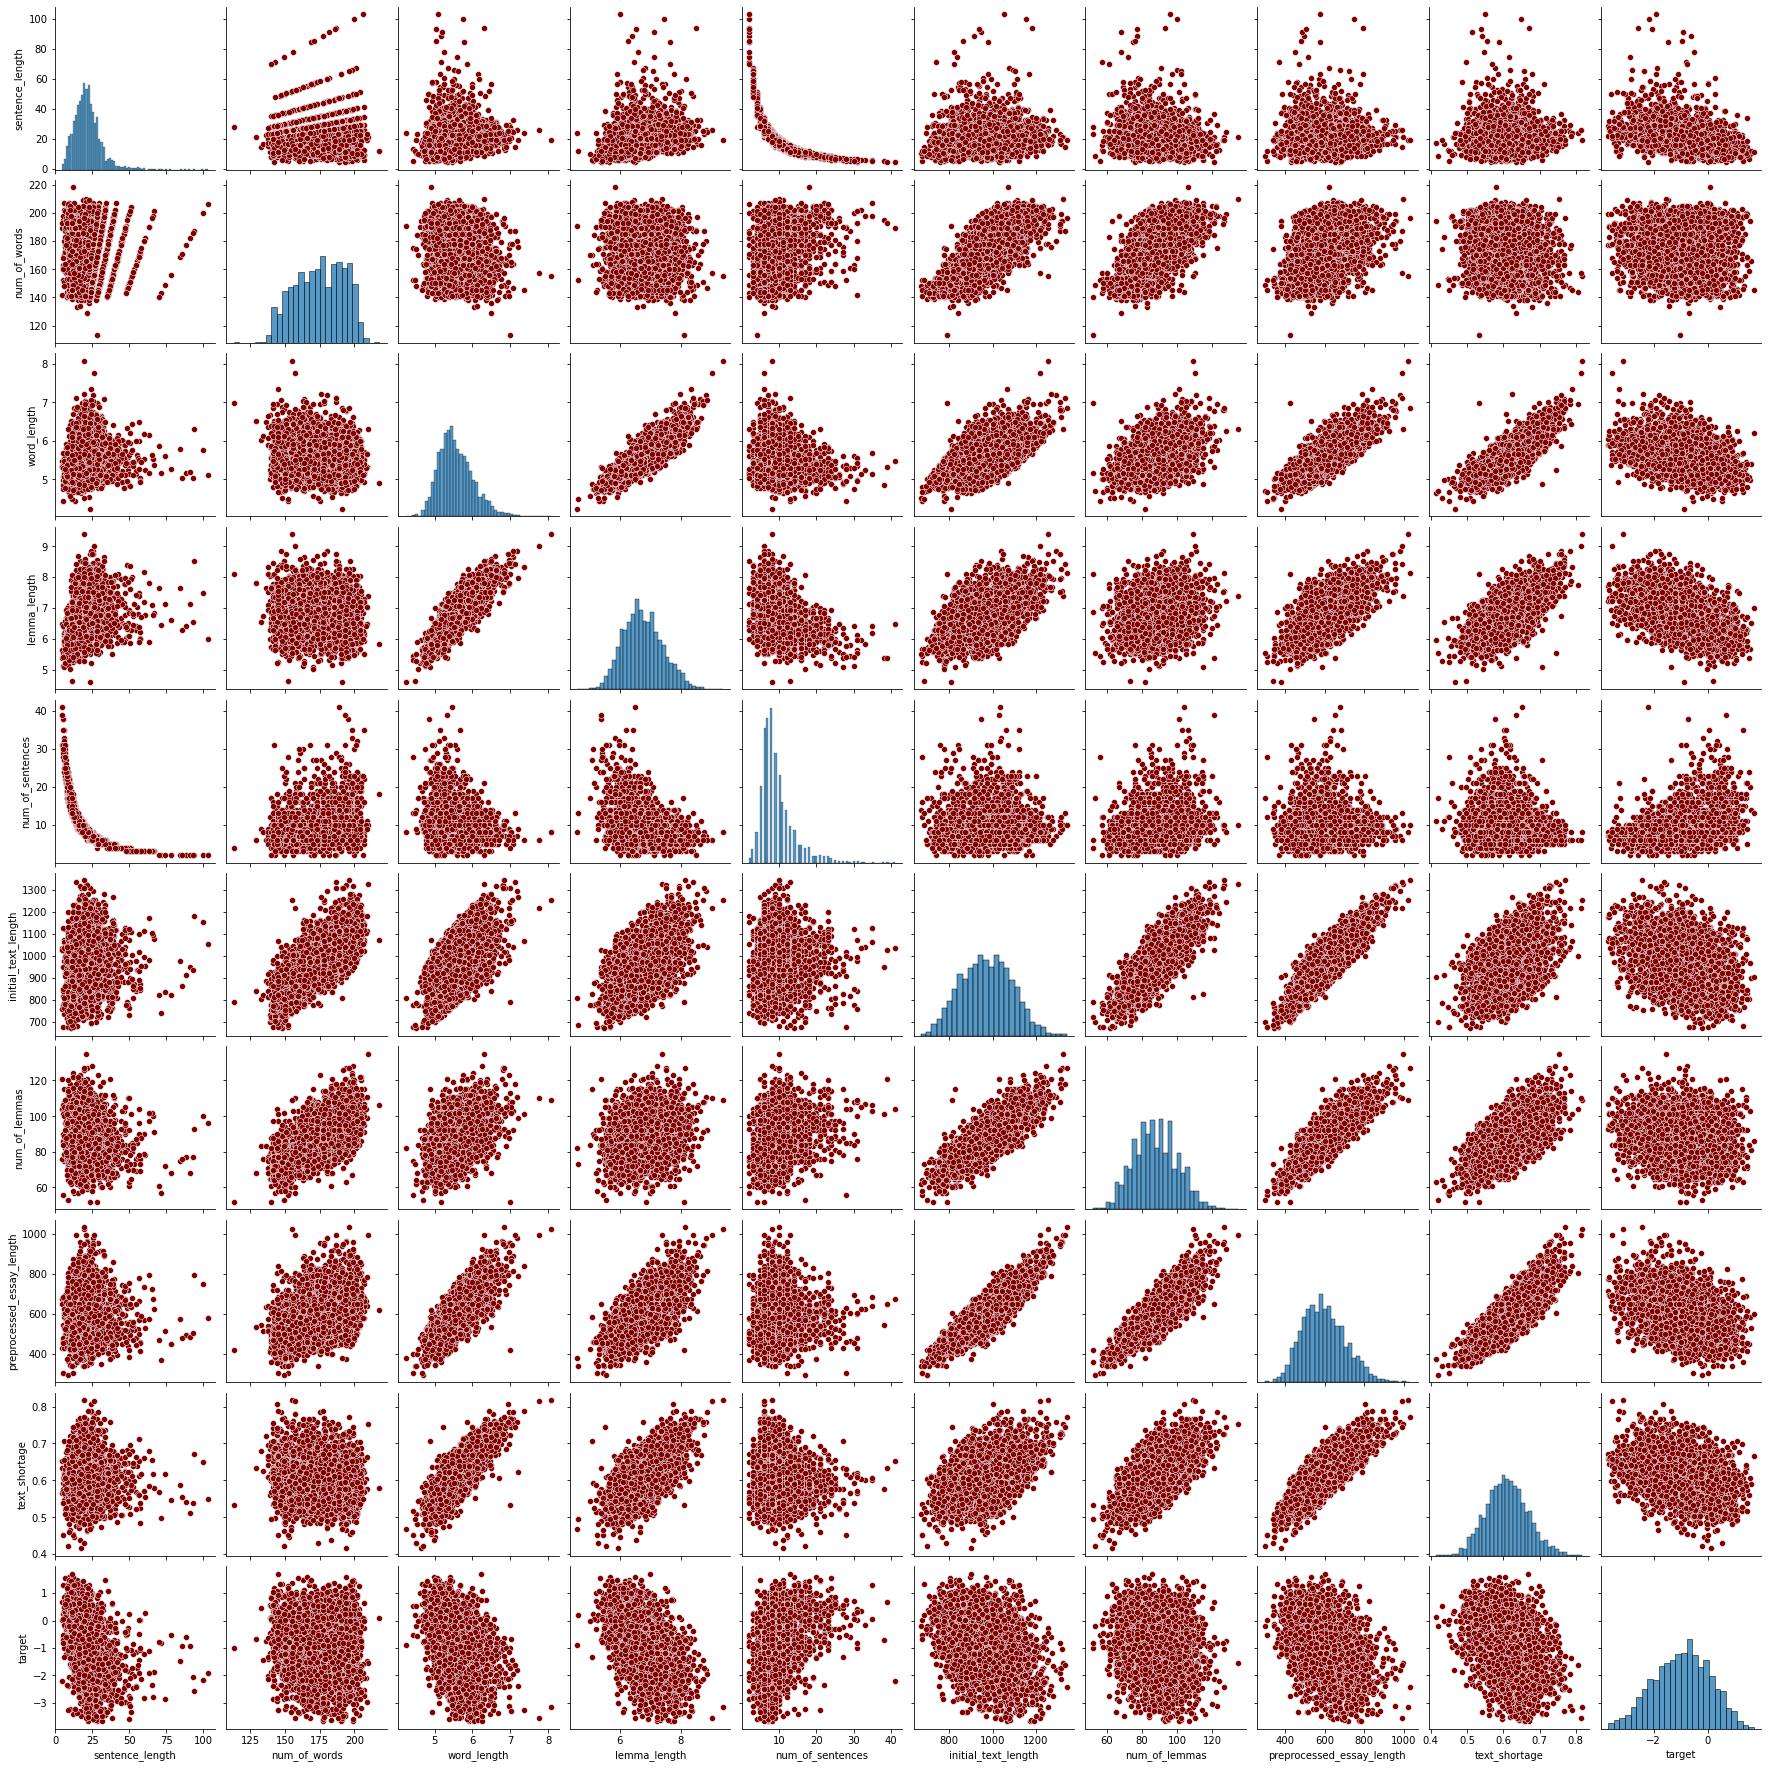

In [30]:
df_for_plotting = pd.concat([final_df, df_train["target"]], axis = 1)
ax = sns.pairplot(data = df_for_plotting, plot_kws = dict(color = "maroon"))
plt.show()

In [31]:
np.zeros_like((3, 3))

array([0, 0])

## Heatmap of Correlation Matrix

When we are using .corr(), we are going to get the correlation values for different features in a form of a table. Since interpreting a table is quite difficult especially with float values present, it would be a good idea to visualize the data and color the points based on their values.

This is done with the aid of heatmap where based on the values present, they would change the intensity of their color. Below is a heatmap plotted that gives us a good idea about the correlation between different features that are important for machine learning. 

By observing the values below, one could get an understand there is a slight negative correlation between lemma_length and the difficulty of the text. In addition, we also see a negative correlation between average word length and the text's difficulty respectively. We see that there is also a clear negative correlation between sentence length and number of sentences. This means that as the number of sentences increase, there is a higher possibility that there can be a high sentence length. However, this does not mean that correlation is equal to causation. But based on the information and the context, we might assure that there is causation between features respectively. 

<AxesSubplot:>

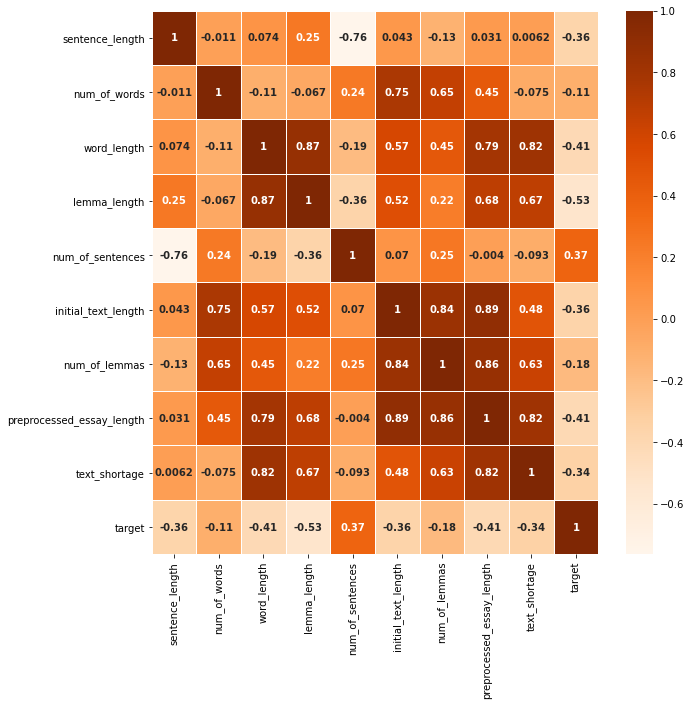

In [32]:
correlation = df_for_plotting.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, annot = True, cmap = 'Oranges', linewidths = 1,
           annot_kws = {"weight": "bold", "fontsize": 10})

## Scatterplot function

It would be a good idea to create scatterplot function that ensures that we are able to change the parameters that are important for machine learning. We see that we might give the default parameters that are important for the scatterplot. However, we have the freedom to change the parameters as and when needed when calling the function.

Since the function would only be used for plotting rather than returning any output, there is no return in a function. 

In [33]:
def scatterplot_function(df: pd.DataFrame, X, Y, figsize = (10, 10), color = 'orange'):
    plt.figure(figsize = figsize)
    sns.scatterplot(data = df, x = X, y = Y, color = color)
    plt.title(f'Scatterplot between {X} and {Y}')
    plt.show()

## Scatterplot between num_of_sentences and target

By looking at the heatmap above, we have considered the correlation between features and seen if there is any relationship between the features.

Now, we would be focusing on the scatterplot between 'num_of_sentences' and 'target' respectively. Below, we see that there is a slight positive relationship between the output and the "num_of_sentences" feature. This could help us understand that there might be a change that when there is increase in the number of sentences, there is a possibility of the difficulty of the text would also increase. But let us not jump to the conclusion as correlation might not always be equal to causation. Hence, let us now explore more features which would ensure that we understand them and we are going to be using them. 

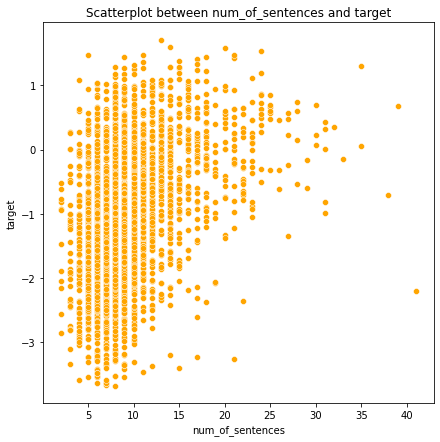

In [34]:
scatterplot_function(df_for_plotting, X = 'num_of_sentences', Y = 'target', figsize = (7, 7))

## Scatterplot between 'preprocessed_essay_length' and 'num_of_lemmas'

Now, we are going to plot between 'preprocessed_essay_length' and 'num_of_lemmas' as we have seen that their correlation value is about 0.86 respectively. Therefore, we have plotted the scatterplot to understand the values respectively. We see that there is a good correlation between the features as there is not much scatter between the 2 features that we have considered.

Lemmas are the words that are created after preprocessing the actual words and replacing those words with their stems but also considering the context at which those words appear. This ensures that we get the right stems that later could be vectorized and given to the machine learning models for processing and prediction respectively. 


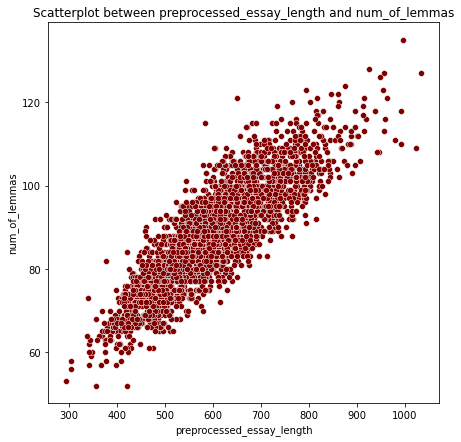

In [35]:
scatterplot_function(df_for_plotting, X = 'preprocessed_essay_length', Y = 'num_of_lemmas', figsize = (7, 7), color = 'maroon')

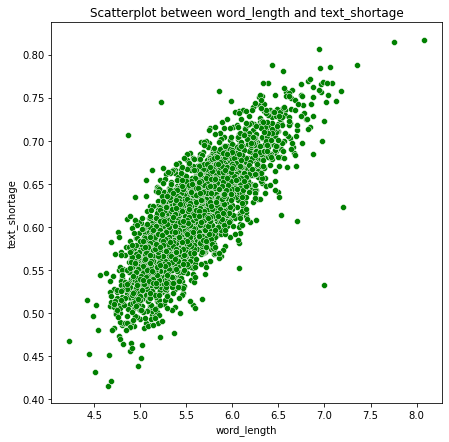

In [36]:
scatterplot_function(df_for_plotting, X = 'word_length', Y = 'text_shortage', figsize = (7, 7), color = 'green')

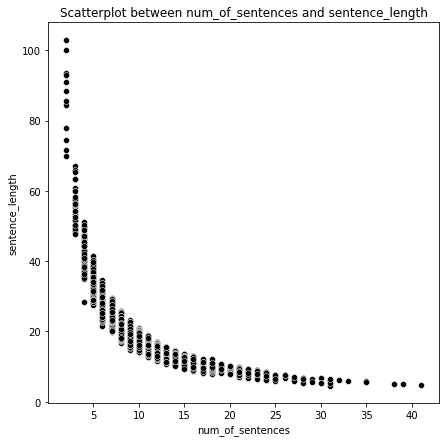

In [37]:
scatterplot_function(df_for_plotting, X = 'num_of_sentences', Y = 'sentence_length', figsize = (7, 7), color = 'black')

In [41]:
type(df_train['excerpt'])

pandas.core.series.Series

In [43]:
df_train['excerpt'].reshap

(2834,)

In [102]:
df_for_plotting = pd.concat([df_with_more_features, df_train['target']], axis = 1)

In [103]:
df_for_plotting.head()

,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word,target
0,14,0,0,0,0,11,11,-0.340259
1,24,0,5,2,12,10,12,-0.315372
2,17,2,1,0,10,11,14,-0.580118
3,23,2,0,0,0,5,13,-1.054013
4,13,10,0,0,0,5,12,0.247197


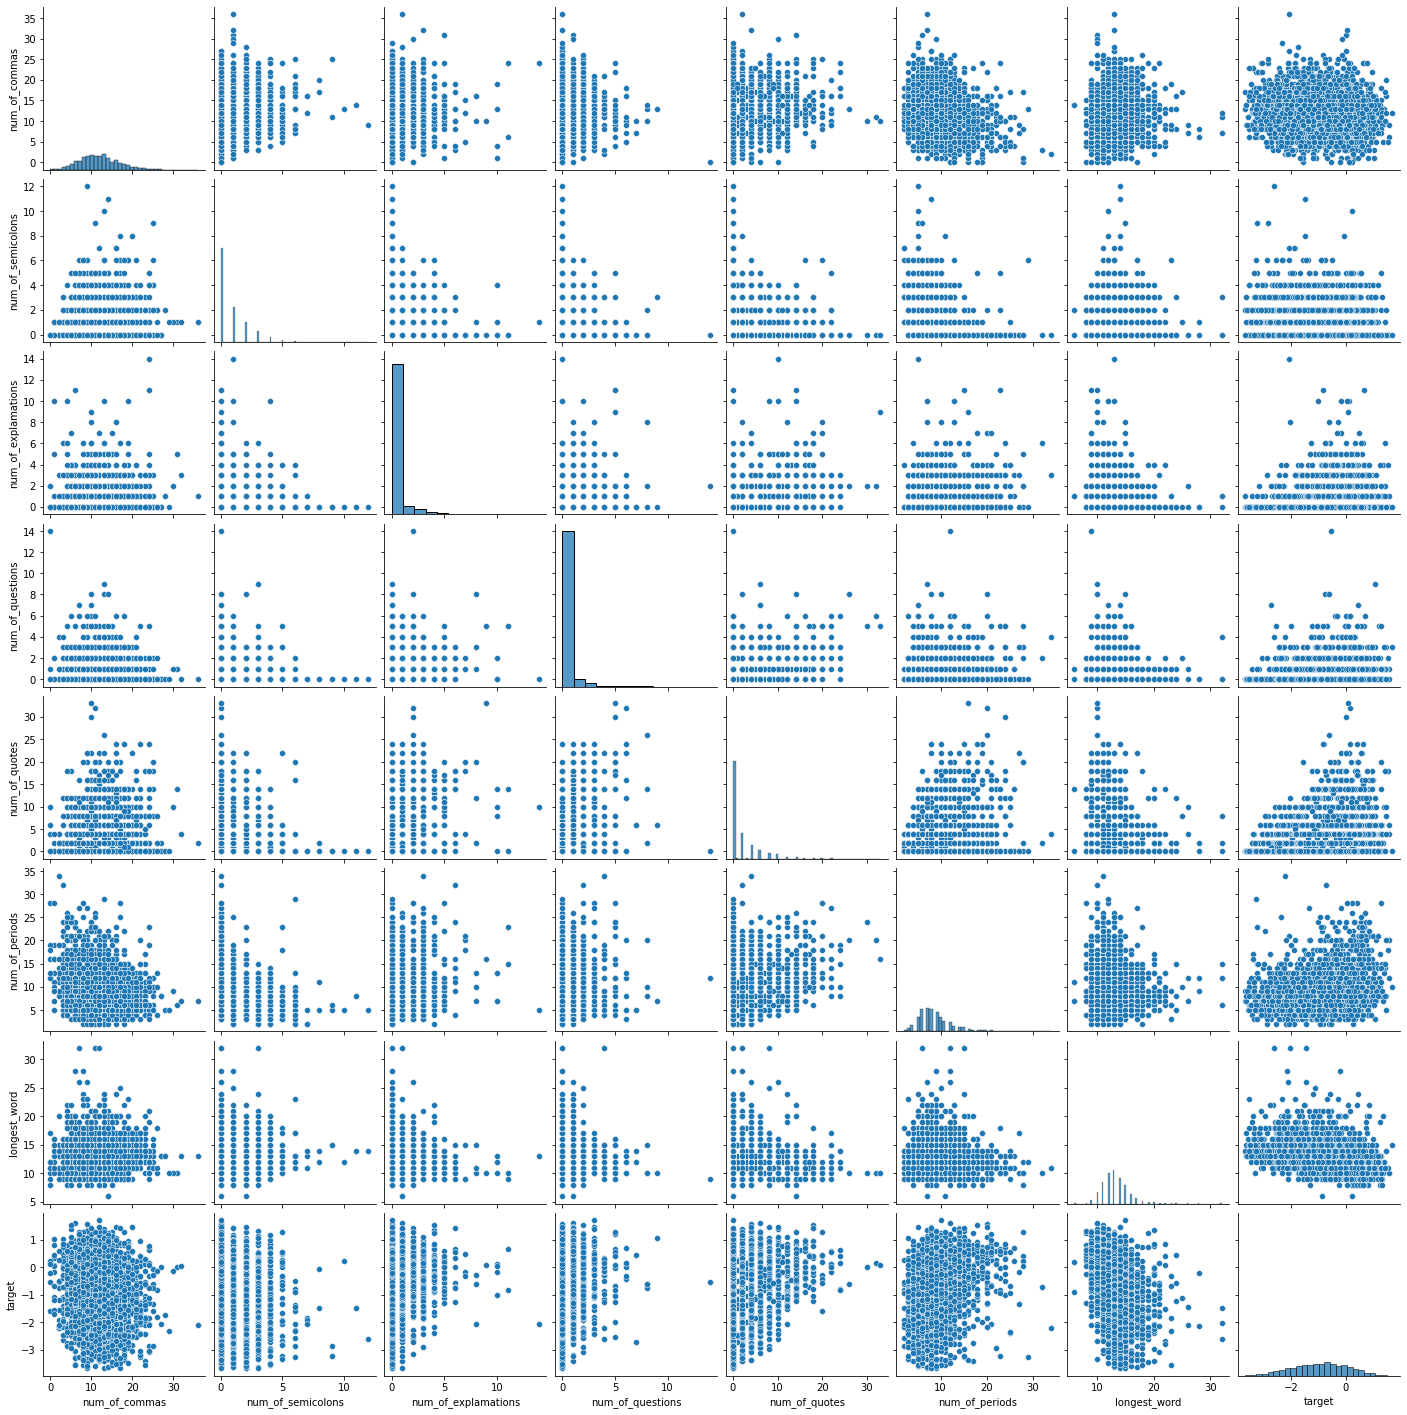

In [104]:
sns.pairplot(df_for_plotting)

In [96]:
def generate_more_features(df: pd.DataFrame):
    """
    This function would create a dataframe of different useful features
    that are important for machine learning predictions respectively.
    """
    commas = []
    semicolon = []
    exclamations = []
    questions = []
    quotes = []
    periods = []
    longest_word = []
    
    for i in range(len(df)):
        
        #word_len = []
        text = df['excerpt'].iloc[i]
        commas.append(text.count(","))
        semicolon.append(text.count(";"))
        exclamations.append(text.count("!"))
        questions.append(text.count("?"))
        quotes.append(text.count('"'))
        periods.append(text.count('.'))
        word_len = [len(w) for w in text.split(" ")]
        longest_word.append(np.max(word_len))
        
    df_with_features =pd.concat((pd.Series(commas), pd.Series(semicolon), pd.Series(exclamations),
                               pd.Series(questions), pd.Series(quotes), pd.Series(periods),
                                pd.Series(longest_word)), axis = 1)
    df_with_features.columns = ["num_of_commas", "num_of_semicolons", "num_of_explamations",
                                "num_of_questions", "num_of_quotes", "num_of_periods", 
                                "longest_word"]
                                
    return df_with_features

In [97]:
df_with_more_features = generate_more_features(df_train)

In [98]:
df_with_more_features.head()

,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word
0,14,0,0,0,0,11,11
1,24,0,5,2,12,10,12
2,17,2,1,0,10,11,14
3,23,2,0,0,0,5,13
4,13,10,0,0,0,5,12


In [99]:
any(df_with_more_features.isnull())

True

In [100]:
df_with_more_features.isnull()

,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2829,False,False,False,False,False,False,False
2830,False,False,False,False,False,False,False
2831,False,False,False,False,False,False,False
2832,False,False,False,False,False,False,False


In [101]:
df_with_more_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   num_of_commas        2834 non-null   int64
 1   num_of_semicolons    2834 non-null   int64
 2   num_of_explamations  2834 non-null   int64
 3   num_of_questions     2834 non-null   int64
 4   num_of_quotes        2834 non-null   int64
 5   num_of_periods       2834 non-null   int64
 6   longest_word         2834 non-null   int32
dtypes: int32(1), int64(6)
memory usage: 144.0 KB


In [61]:
df_with_more_features.head()

,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,word_len,longest_word
0,14,0,0,0,0,11,7.0,11
1,24,0,5,2,3,10,3.0,12
2,17,2,1,0,4,11,4.0,14
3,23,2,0,0,0,5,2.0,13
4,13,10,0,0,0,5,4.0,12


In [73]:
df_train['excerpt'].iloc[140]

'Little Sara Crewe never went in or out of the house without reading that door plate and reflecting upon it. By the time she was twelve, she had decided that all her trouble arose because, in the first place, she was not "Select," and in the second she was not a "Young Lady." When she was eight years old, she had been brought to Miss Minchin as a pupil, and left with her. Her papa had brought her all the way from India. Her mamma had died when she was a baby, and her papa had kept her with him as long as he could. And then, finding the hot climate was making her very delicate, he had brought her to England and left her with Miss Minchin, to be part of the Select Seminary for Young Ladies. Sara, who had always been a sharp little child, who remembered things, recollected hearing him say that he had not a relative in the world whom he knew of, and so he was obliged to place her at a boarding-school, and he had heard Miss Minchin\'s establishment spoken of very highly.'

In [75]:
df_train['excerpt'].iloc[143]

'"You really wish me to understand, Brady, that not you alone, but all the elder boys—day-pupils and boarders alike—desire of your own free-will to devote your next Saturday\'s half-holiday to conveying this poor man\'s plants from his house at Brickland to the Rookwood sale?" "Yes, sir, that\'s what we want to do." "H\'m! Well, the proposal does you credit, and you certainly might employ your time much worse than in carrying it out. I don\'t think it would be right for me to refuse your request. Mr. Anderson, I feel sure, will be ready to help and advise you, if necessary, but as the idea is your own I should like you, as far as possible, to carry it out by yourselves." "Thank you, sir!" said Jack, and withdrew. It was evening when this dialogue took place. The day-boys had departed in an irritable frame of mind, on account of various annoyances of which they had been the victims during the past two days. Bacon had been tripped up twice by a piece of string, Hughes had found his coat-

In [63]:
df_with_more_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_of_commas        2834 non-null   int64  
 1   num_of_semicolons    2834 non-null   int64  
 2   num_of_explamations  2834 non-null   int64  
 3   num_of_questions     2834 non-null   int64  
 4   num_of_quotes        2834 non-null   int64  
 5   num_of_periods       2834 non-null   int64  
 6   word_len             146 non-null    float64
 7   longest_word         2834 non-null   int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 166.2 KB


In [48]:
passage = "Suhas is a good boy"

In [49]:
passage.count(" ")

4

In [56]:
count_list = []
count_list.append(pd.Series(df_train['excerpt'].iloc[0].count(" ")))

In [57]:
count_list

[0    178
 dtype: int64]

In [53]:
df_train['excerpt']

0       When the young people returned to the ballroom...
1       All through dinner time, Mrs. Fayre was somewh...
2       As Roger had predicted, the snow departed as q...
3       And outside before the palace a great garden w...
4       Once upon a time there were Three Bears who li...
                              ...                        
2829    When you think of dinosaurs and where they liv...
2830    So what is a solid? Solids are usually hard be...
2831    The second state of matter we will discuss is ...
2832    Solids are shapes that you can actually touch....
2833    Animals are made of many cells. They eat thing...
Name: excerpt, Length: 2834, dtype: object

In [40]:
generate_more_features(df_train)

ValueError: Series.count level is only valid with a MultiIndex

In [71]:
generate_more_features(df_train)

ValueError: Series.count level is only valid with a MultiIndex

In [76]:
df_train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [77]:
df_train['excerpt_length'] = df_train.excerpt.apply(len)

In [78]:
df_train.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_length
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,992
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,937
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,908
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,909
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,723


In [79]:
df_train.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_length
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,992
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,937
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,908
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,909
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,723
